### Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Battery_RUL.csv')

In [3]:
df.head()

,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
0,1.0,2595.30,1151.488500,3.670,3.211,5460.001,6755.01,10777.82,1112
1,2.0,7408.64,1172.512500,4.246,3.220,5508.992,6762.02,10500.35,1111
2,3.0,7393.76,1112.992000,4.249,3.224,5508.993,6762.02,10420.38,1110
3,4.0,7385.50,1080.320667,4.250,3.225,5502.016,6762.02,10322.81,1109
4,6.0,65022.75,29813.487000,4.290,3.398,5480.992,53213.54,56699.65,1107


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15064 entries, 0 to 15063
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Cycle_Index                15064 non-null  float64
 1   Discharge Time (s)         15064 non-null  float64
 2   Decrement 3.6-3.4V (s)     15064 non-null  float64
 3   Max. Voltage Dischar. (V)  15064 non-null  float64
 4   Min. Voltage Charg. (V)    15064 non-null  float64
 5   Time at 4.15V (s)          15064 non-null  float64
 6   Time constant current (s)  15064 non-null  float64
 7   Charging time (s)          15064 non-null  float64
 8   RUL                        15064 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.0 MB


In [5]:
df.isnull().sum()

Cycle_Index                  0
Discharge Time (s)           0
Decrement 3.6-3.4V (s)       0
Max. Voltage Dischar. (V)    0
Min. Voltage Charg. (V)      0
Time at 4.15V (s)            0
Time constant current (s)    0
Charging time (s)            0
RUL                          0
dtype: int64

In [6]:
df.describe()

,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
count,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000
mean,556.155005,4581.273960,1239.784672,3.908176,3.577904,3768.336171,5461.266970,10066.496204,554.194172
std,322.378480,33144.012077,15039.589269,0.091003,0.123695,9129.552477,25155.845202,26415.354121,322.434514
min,1.000000,8.690000,-397645.908000,3.043000,3.022000,-113.584000,5.980000,5.980000,0.000000
25%,271.000000,1169.310000,319.600000,3.846000,3.488000,1828.884179,2564.310000,7841.922500,277.000000
50%,560.000000,1557.250000,439.239471,3.906000,3.574000,2930.203500,3824.260000,8320.415000,551.000000
75%,833.000000,1908.000000,600.000000,3.972000,3.663000,4088.326500,5012.350000,8763.282500,839.000000
max,1134.000000,958320.370000,406703.768000,4.363000,4.379000,245101.117000,880728.100000,880728.100000,1133.000000


In [7]:
df['Cycle_Index']=df['Cycle_Index'].astype('int') 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15064 entries, 0 to 15063
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Cycle_Index                15064 non-null  int64  
 1   Discharge Time (s)         15064 non-null  float64
 2   Decrement 3.6-3.4V (s)     15064 non-null  float64
 3   Max. Voltage Dischar. (V)  15064 non-null  float64
 4   Min. Voltage Charg. (V)    15064 non-null  float64
 5   Time at 4.15V (s)          15064 non-null  float64
 6   Time constant current (s)  15064 non-null  float64
 7   Charging time (s)          15064 non-null  float64
 8   RUL                        15064 non-null  int64  
dtypes: float64(7), int64(2)
memory usage: 1.0 MB


In [9]:
df.corr()

,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
Cycle_Index,1.000000,-0.011925,-0.012090,-0.782859,0.759850,-0.176486,-0.040622,-0.018305,-0.999756
Discharge Time (s),-0.011925,1.000000,0.444984,0.349161,-0.239410,0.776720,0.912536,0.935544,0.011957
Decrement 3.6-3.4V (s),-0.012090,0.444984,1.000000,0.199470,-0.132765,0.477091,0.343228,0.371610,0.011998
Max. Voltage Dischar. (V),-0.782859,0.349161,0.199470,1.000000,-0.718182,0.446070,0.286886,0.269009,0.782800
Min. Voltage Charg. (V),0.759850,-0.239410,-0.132765,-0.718182,1.000000,-0.344098,-0.216840,-0.200423,-0.759805
Time at 4.15V (s),-0.176486,0.776720,0.477091,0.446070,-0.344098,1.000000,0.568922,0.676859,0.176514
Time constant current (s),-0.040622,0.912536,0.343228,0.286886,-0.216840,0.568922,1.000000,0.953522,0.040675
Charging time (s),-0.018305,0.935544,0.371610,0.269009,-0.200423,0.676859,0.953522,1.000000,0.018299
RUL,-0.999756,0.011957,0.011998,0.782800,-0.759805,0.176514,0.040675,0.018299,1.000000


<Axes: >

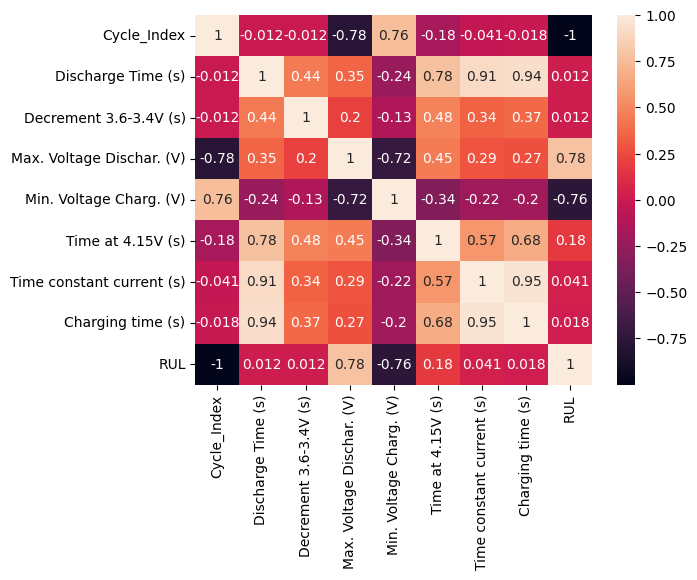

In [10]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True)

In [11]:
## Independent and Dependent features
X=df.iloc[:,:-1] #independent features
y=df.iloc[:,-1] #dependent features 

In [12]:
X.head()

,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s)
0,1,2595.30,1151.488500,3.670,3.211,5460.001,6755.01,10777.82
1,2,7408.64,1172.512500,4.246,3.220,5508.992,6762.02,10500.35
2,3,7393.76,1112.992000,4.249,3.224,5508.993,6762.02,10420.38
3,4,7385.50,1080.320667,4.250,3.225,5502.016,6762.02,10322.81
4,6,65022.75,29813.487000,4.290,3.398,5480.992,53213.54,56699.65


In [13]:
y

0        1112
1        1111
2        1110
3        1109
4        1107
         ... 
15059       4
15060       3
15061       2
15062       1
15063       0
Name: RUL, Length: 15064, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [15]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((11298, 8), (11298,), (3766, 8), (3766,))

In [16]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [17]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [18]:
X_train

array([[ 0.87753686, -0.10303404, -0.06480453, ..., -0.20696929,
        -0.11408476, -0.0603371 ],
       [-1.30520796, -0.07671736, -0.03969285, ...,  0.10447808,
         0.01450216, -0.04405439],
       [-0.44947278, -0.08646408, -0.05632311, ..., -0.01262027,
        -0.03225347, -0.04842182],
       ...,
       [-1.7175731 , -0.0597511 ,  0.0022819 , ...,  0.18613754,
         0.06505138,  0.05275661],
       [ 1.03876233, -0.10811973, -0.06727413, ..., -0.26516679,
        -0.1385455 , -0.08618024],
       [ 0.83413   , -0.11010949, -0.0697232 , ..., -0.24600118,
        -0.13746281, -0.08805131]], shape=(11298, 8))

In [19]:
X_test

array([[-1.51914176, -0.074085  , -0.03543551, ...,  0.14365391,
         0.03120222, -0.02850365],
       [-1.16878641, -0.07892242, -0.04348455, ...,  0.0844172 ,
         0.00615839, -0.04365422],
       [ 0.25123792, -0.09593517, -0.05933556, ..., -0.10380045,
        -0.07233576, -0.07344373],
       ...,
       [-1.43542853, -0.07536162, -0.03853539, ...,  0.12623002,
         0.02285335, -0.03582072],
       [ 1.28370102, -0.11322619, -0.07152316, ..., -0.27050154,
        -0.14915392, -0.10873585],
       [ 1.09147065, -0.11246358, -0.07096723, ..., -0.26901434,
        -0.14915624, -0.04711202]], shape=(3766, 8))

### Model Training

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
regression=LinearRegression()

In [22]:
regression

LinearRegression()

In [23]:
regression.fit(X_train,y_train)

LinearRegression()

In [24]:
## slope or coefficients
regression.coef_

array([-3.22331852e+02, -3.29876152e-01, -7.53031890e-02,  9.91890979e-02,
       -6.08204467e-02,  2.62539020e-01,  5.37785127e-01, -3.43209138e-01])

In [25]:
## intercepts
regression.intercept_

np.float64(555.3626305540804)

In [26]:
## Prediction for the test data
y_pred=regression.predict(X_test)

In [27]:
y_test

8692     1043
4489      956
8163      469
13837     176
7709      943
         ... 
4860      568
8969      765
4403     1042
9568      139
6271      196
Name: RUL, Length: 3766, dtype: int64

In [28]:
y_pred

array([1045.31787451,  932.32254885,  474.37995454, ..., 1018.31917211,
        141.36795219,  203.2931466 ], shape=(3766,))

In [29]:
## Performance Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(np.sqrt(mean_squared_error(y_test,y_pred)))

52.27837805891226
4.559248457726738
7.230378832323536


In [30]:
## R square and adjusted R square

from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)

0.9994954201232327


In [31]:
## Adjusted R square
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.9994943456917676

In [32]:
from sklearn.model_selection import KFold , cross_val_score

In [33]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(regression,X, y, cv=cv, scoring='r2')
print(f"CV R2 mean ± std:{cv_scores.mean()} ± {cv_scores.std()}")

CV R2 mean ± std:0.9995113681637318 ± 2.9668574566739548e-05


Text(0, 0.5, 'Test Predicted Data')

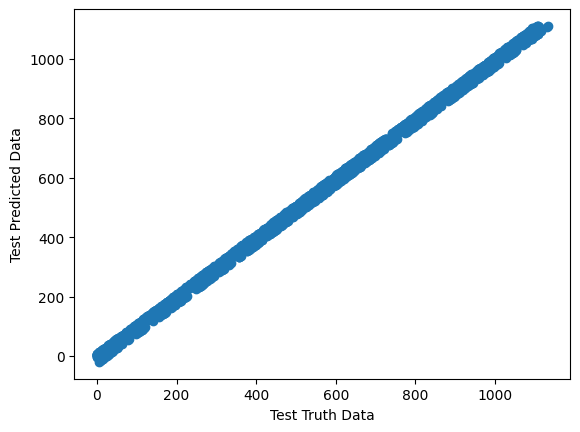

In [34]:
plt.scatter(y_test,y_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

In [35]:
residuals=y_test-y_pred
residuals

8692     -2.317875
4489     23.677451
8163     -5.379955
13837     3.623424
7709     -5.331109
           ...    
4860     23.638960
8969     -2.335147
4403     23.680828
9568     -2.367952
6271     -7.293147
Name: RUL, Length: 3766, dtype: float64

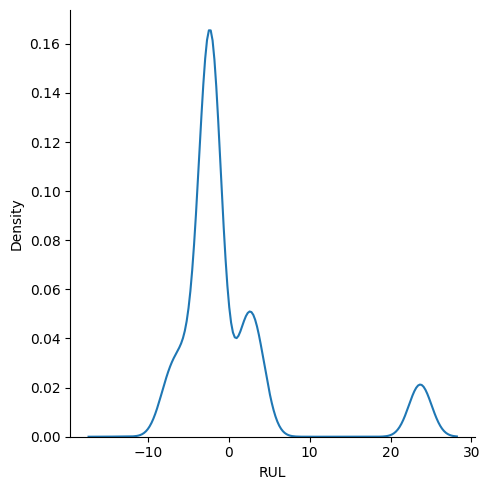

In [36]:
sns.displot(residuals,kind="kde")

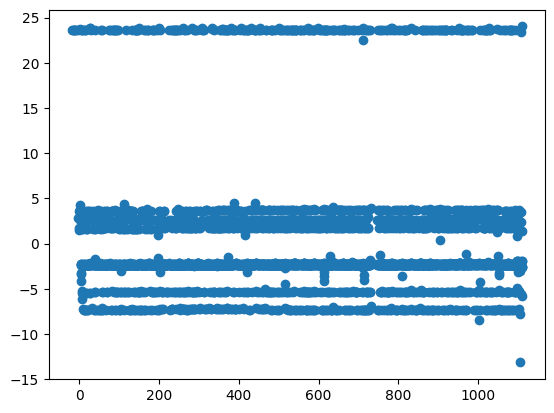

In [37]:
## SCatter plot with predictions and residual
##uniform distribution
plt.scatter(y_pred,residuals)

Mean absolute error 4.558044144516929
R2 Score 0.9994950856073335


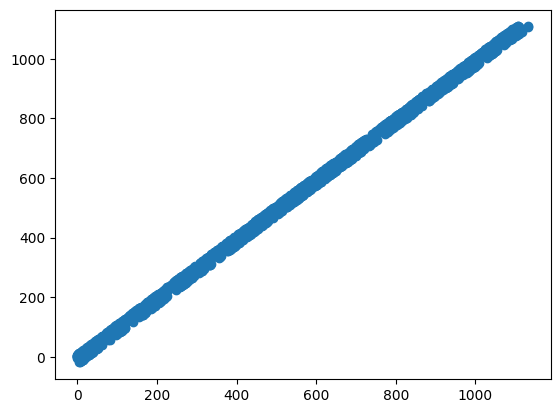

In [38]:
from sklearn.linear_model import LassoCV
lassocv=LassoCV(cv=5)
lassocv.fit(X_train,y_train)
y_pred=lassocv.predict(X_test)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

In [39]:
lassocv.alpha_

np.float64(0.3225180805862169)

Mean absolute error 4.558982127476345
R2 Score 0.9994954244144626


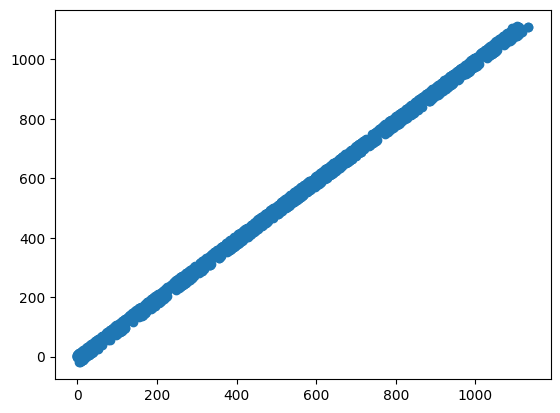

In [40]:
from sklearn.linear_model import RidgeCV
ridgecv=RidgeCV(cv=5)
ridgecv.fit(X_train,y_train)
y_pred=ridgecv.predict(X_test)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

In [41]:
ridgecv.alpha_

np.float64(0.1)

Mean absolute error 59.21776419449567
R2 Score 0.9397192966638109


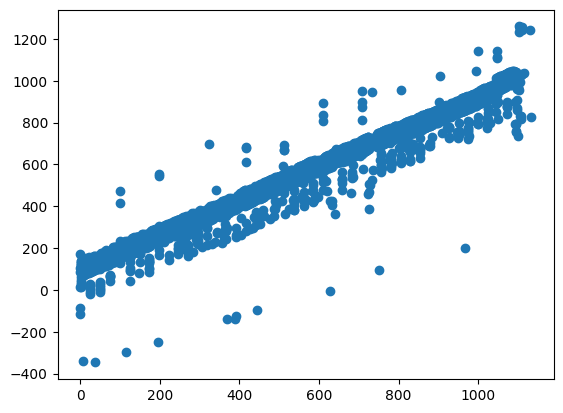

In [42]:
from sklearn.linear_model import ElasticNetCV
elasticcv=ElasticNetCV(cv=5)
elasticcv.fit(X_train,y_train)
y_pred=elasticcv.predict(X_test)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

Mean absolute error 4.558982127476345
R2 Score 0.9994954244144626


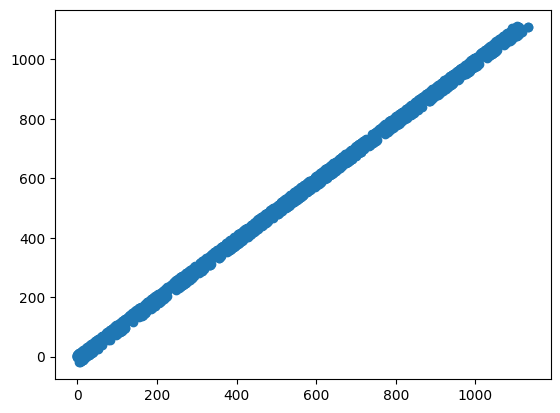

In [43]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridge=Ridge(alpha=0.1)
ridge.fit(X_train,y_train)
y_pred=ridge.predict(X_test)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

### Pickling 
##### Pickle the machine learning models , preprocessing model standardscaler

In [44]:
scaler

StandardScaler()

In [45]:
ridge

Ridge(alpha=0.1)

In [46]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(ridge,open('ridge.pkl','wb'))

In [48]:
df.columns

Index(['Cycle_Index', 'Discharge Time (s)', 'Decrement 3.6-3.4V (s)',
       'Max. Voltage Dischar. (V)', 'Min. Voltage Charg. (V)',
       'Time at 4.15V (s)', 'Time constant current (s)', 'Charging time (s)',
       'RUL'],
      dtype='object')

In [52]:
df.iloc[:,0].min()

np.int64(1)

In [55]:
ridge.predict(scaler.transform([[df.iloc[:,0].min(),df.iloc[:,1].max(),df.iloc[:,2].max(),df.iloc[:,3].max(),df.iloc[:,4].max(),df.iloc[:,5].max(),df.iloc[:,6].median(),df.iloc[:,7].min()]]))

d:\Govind\Daily\Coding\AI_and_ML\Udemy\python\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([1103.81555354])